In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
print(os.getcwd())

/content


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Dental Hardness data.xlsx to Dental Hardness data.xlsx
Saving Zingaro_Company.csv to Zingaro_Company.csv


# Problem 1: Football Team Injury Analysis

In [5]:
# Data provided in the table
data = {
    'Striker': {'Injured': 45, 'Not Injured': 32, 'Total': 77},
    'Forward': {'Injured': 56, 'Not Injured': 38, 'Total': 94},
    'Attacking Midfielder': {'Injured': 24, 'Not Injured': 11, 'Total': 35},
    'Winger': {'Injured': 20, 'Not Injured': 9, 'Total': 29},
    'Total': {'Injured': 145, 'Not Injured': 90, 'Total': 235}
}


In [7]:
total_players = data['Total']['Total']
total_injured_players = data['Total']['Injured']
total_forwards = data['Forward']['Total']
total_wingers = data['Winger']['Total']
injured_strikers = data['Striker']['Injured']

# 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [8]:
prob_injured = total_injured_players / total_players
print(f"1.1 Probability that a randomly chosen player would suffer an injury: {prob_injured:.3f}")

1.1 Probability that a randomly chosen player would suffer an injury: 0.617


# 1.2 What is the probability that a player is a forward or a winger?

In [9]:
prob_forward_or_winger = (total_forwards + total_wingers) / total_players
print(f"1.2 Probability that a player is a forward or a winger: {prob_forward_or_winger:.3f}")

1.2 Probability that a player is a forward or a winger: 0.523


# 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [10]:
prob_striker_and_injured = injured_strikers / total_players
print(f"1.3 Probability that a randomly chosen player plays in a striker position and has a foot injury: {prob_striker_and_injured:.3f}")

1.3 Probability that a randomly chosen player plays in a striker position and has a foot injury: 0.191


# 1.4 What is the probability that a randomly chosen injured player is a striker?

In [11]:
prob_striker_given_injured = injured_strikers / total_injured_players
print(f"1.4 Probability that a randomly chosen injured player is a striker: {prob_striker_given_injured:.3f}")

1.4 Probability that a randomly chosen injured player is a striker: 0.310


In [13]:
mu = 5
sigma = 1.5

print("Problem 2: Breaking Strength of Gunny Bags (Normal Distribution)\n")

Problem 2: Breaking Strength of Gunny Bags (Normal Distribution)



2.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [14]:
z_2_1 = (3.17 - mu) / sigma
p_2_1 = stats.norm.cdf(3.17, loc=mu, scale=sigma)
print(f"2.1 Proportion of gunny bags with breaking strength less than 3.17 kg/sq cm:")
print(f"   Z-score: {z_2_1:.3f}")
print(f"   Probability: {p_2_1:.4f}\n")

2.1 Proportion of gunny bags with breaking strength less than 3.17 kg/sq cm:
   Z-score: -1.220
   Probability: 0.1112



# Visual representation for 2.1

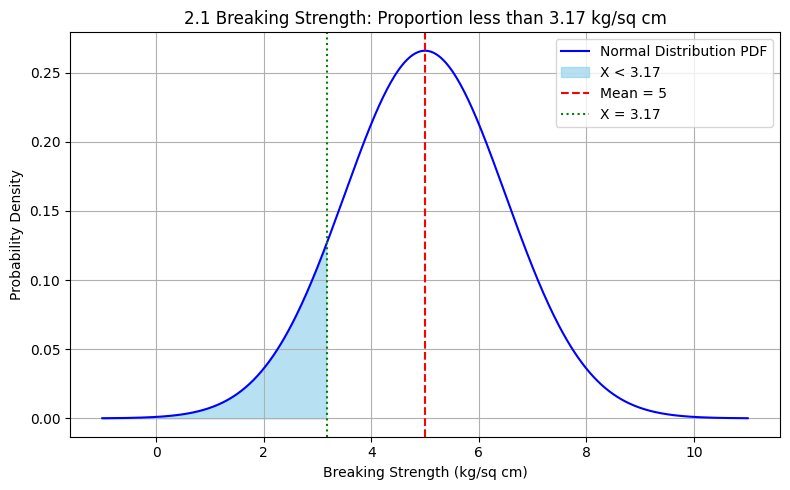

In [15]:
plt.figure(figsize=(8, 5))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500) # Extend range for better visualization
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='blue', label='Normal Distribution PDF')
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where=(x < 3.17), color='skyblue', alpha=0.6, label='X < 3.17')
plt.axvline(mu, color='red', linestyle='--', label=f'Mean = {mu}')
plt.axvline(3.17, color='green', linestyle=':', label=f'X = 3.17')
plt.title('2.1 Breaking Strength: Proportion less than 3.17 kg/sq cm')
plt.xlabel('Breaking Strength (kg/sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [16]:
z_2_2 = (3.6 - mu) / sigma
p_2_2 = 1 - stats.norm.cdf(3.6, loc=mu, scale=sigma)
print(f"2.2 Proportion of gunny bags with breaking strength at least 3.6 kg/sq cm:")
print(f"   Z-score: {z_2_2:.3f}")
print(f"   Probability: {p_2_2:.4f}\n")

2.2 Proportion of gunny bags with breaking strength at least 3.6 kg/sq cm:
   Z-score: -0.933
   Probability: 0.8247



# Visual representation for 2.2

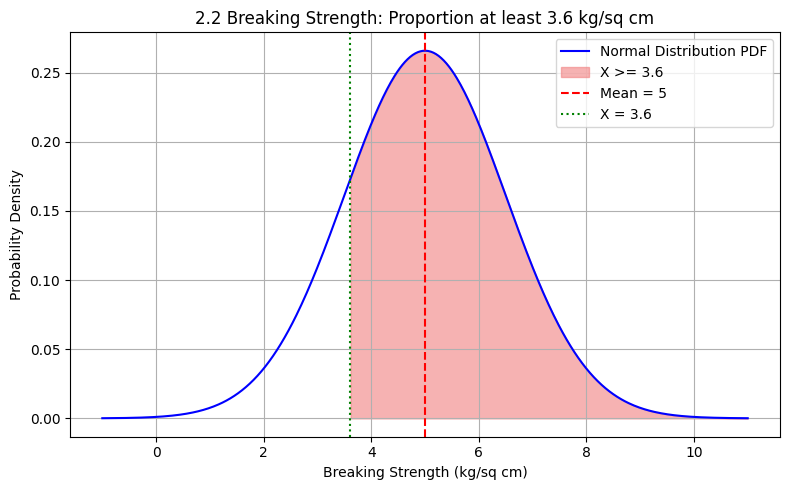

In [17]:
plt.figure(figsize=(8, 5))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='blue', label='Normal Distribution PDF')
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where=(x >= 3.6), color='lightcoral', alpha=0.6, label='X >= 3.6')
plt.axvline(mu, color='red', linestyle='--', label=f'Mean = {mu}')
plt.axvline(3.6, color='green', linestyle=':', label=f'X = 3.6')
plt.title('2.2 Breaking Strength: Proportion at least 3.6 kg/sq cm')
plt.xlabel('Breaking Strength (kg/sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [18]:
z_2_3_lower = (5 - mu) / sigma
z_2_3_upper = (5.5 - mu) / sigma
p_2_3 = stats.norm.cdf(5.5, loc=mu, scale=sigma) - stats.norm.cdf(5, loc=mu, scale=sigma)
print(f"2.3 Proportion of gunny bags with breaking strength between 5 and 5.5 kg/sq cm:")
print(f"   Z-score for 5: {z_2_3_lower:.3f}")
print(f"   Z-score for 5.5: {z_2_3_upper:.3f}")
print(f"   Probability: {p_2_3:.4f}\n")

2.3 Proportion of gunny bags with breaking strength between 5 and 5.5 kg/sq cm:
   Z-score for 5: 0.000
   Z-score for 5.5: 0.333
   Probability: 0.1306



# Visual representation for 2.3

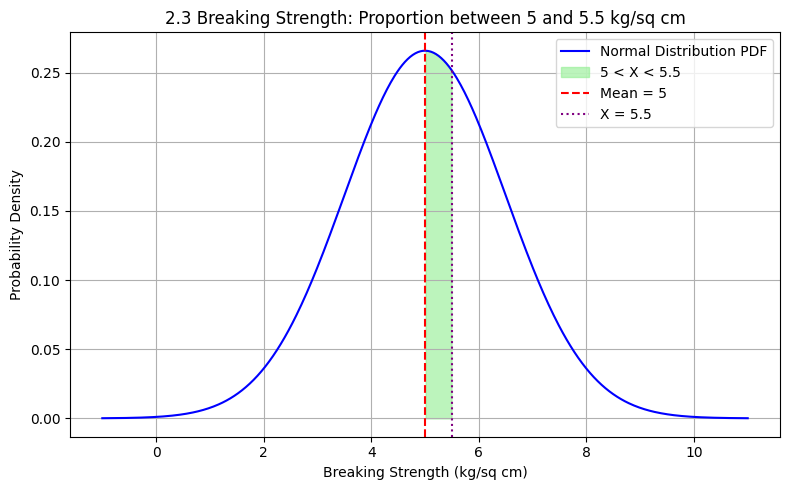

In [19]:
plt.figure(figsize=(8, 5))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='blue', label='Normal Distribution PDF')
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where=((x > 5) & (x < 5.5)), color='lightgreen', alpha=0.6, label='5 < X < 5.5')
plt.axvline(mu, color='red', linestyle='--', label=f'Mean = {mu}')
plt.axvline(5.5, color='purple', linestyle=':', label=f'X = 5.5')
plt.title('2.3 Breaking Strength: Proportion between 5 and 5.5 kg/sq cm')
plt.xlabel('Breaking Strength (kg/sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [20]:
z_2_4_lower = (3 - mu) / sigma
z_2_4_upper = (7.5 - mu) / sigma
p_2_4 = stats.norm.cdf(3, loc=mu, scale=sigma) + (1 - stats.norm.cdf(7.5, loc=mu, scale=sigma))
print(f"2.4 Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg/sq cm:")
print(f"   Z-score for 3: {z_2_4_lower:.3f}")
print(f"   Z-score for 7.5: {z_2_4_upper:.3f}")
print(f"   Probability: {p_2_4:.4f}\n")

2.4 Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg/sq cm:
   Z-score for 3: -1.333
   Z-score for 7.5: 1.667
   Probability: 0.1390



# Visual representation for 2.4

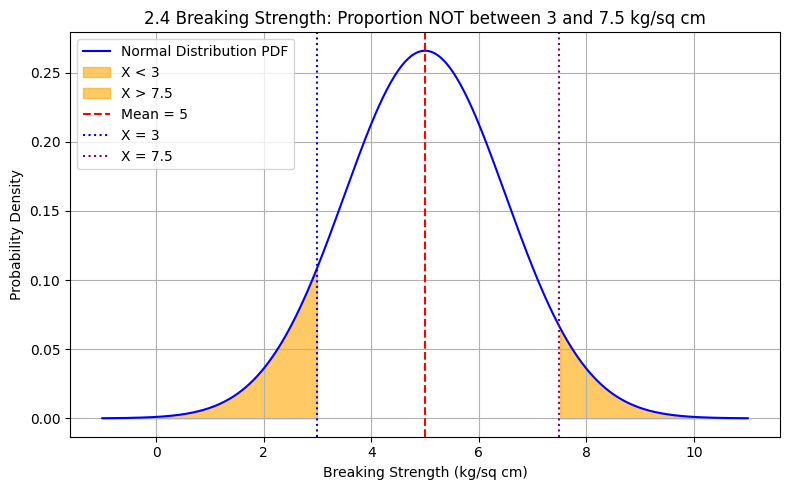

In [21]:
plt.figure(figsize=(8, 5))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='blue', label='Normal Distribution PDF')
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where=(x < 3), color='orange', alpha=0.6, label='X < 3')
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where=(x > 7.5), color='orange', alpha=0.6, label='X > 7.5')
plt.axvline(mu, color='red', linestyle='--', label=f'Mean = {mu}')
plt.axvline(3, color='blue', linestyle=':', label=f'X = 3')
plt.axvline(7.5, color='purple', linestyle=':', label=f'X = 7.5')
plt.title('2.4 Breaking Strength: Proportion NOT between 3 and 7.5 kg/sq cm')
plt.xlabel('Breaking Strength (kg/sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
zingaro_df = pd.read_csv('Zingaro_Company.csv')

In [23]:
zingaro_df.columns = ['Unpolished', 'Polished']

In [24]:
alpha = 0.05

print("Problem 3: Zingaro Stone Printing Hypothesis Testing\n")

Problem 3: Zingaro Stone Printing Hypothesis Testing



3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [25]:
required_hardness = 150
t_statistic_unpolished, p_value_unpolished = stats.ttest_1samp(a=zingaro_df['Unpolished'], popmean=required_hardness, alternative='less')

print(f"3.1 One-Sample t-test for Unpolished Stones vs. Required Hardness (150):")
print(f"   Mean hardness of unpolished stones: {zingaro_df['Unpolished'].mean():.2f}")
print(f"   T-statistic: {t_statistic_unpolished:.3f}")
print(f"   P-value: {p_value_unpolished:.3f}")

if p_value_unpolished < alpha:
    print(f"   Since p-value ({p_value_unpolished:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("   Conclusion: Zingaro is justified in thinking that unpolished stones may not be suitable for printing, as their mean hardness is significantly less than 150.\n")
else:
    print(f"   Since p-value ({p_value_unpolished:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("   Conclusion: Zingaro is not justified in thinking that unpolished stones may not be suitable for printing, as their mean hardness is not significantly less than 150.\n")

3.1 One-Sample t-test for Unpolished Stones vs. Required Hardness (150):
   Mean hardness of unpolished stones: 134.11
   T-statistic: -4.165
   P-value: 0.000
   Since p-value (0.000) < alpha (0.05), we reject the null hypothesis.
   Conclusion: Zingaro is justified in thinking that unpolished stones may not be suitable for printing, as their mean hardness is significantly less than 150.



# Visual representation for 3.1 (Box plot with a line for required hardness)

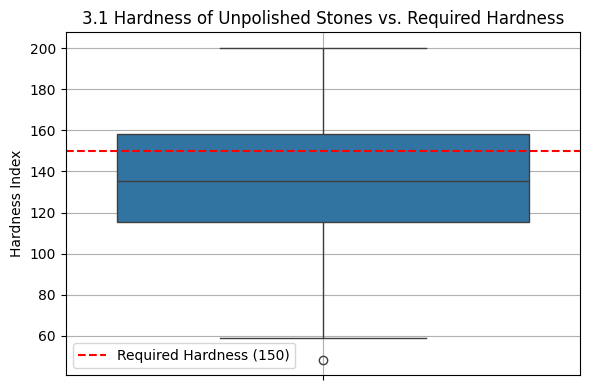

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=zingaro_df['Unpolished'])
plt.axhline(y=required_hardness, color='red', linestyle='--', label='Required Hardness (150)')
plt.title('3.1 Hardness of Unpolished Stones vs. Required Hardness')
plt.ylabel('Hardness Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('unpolished_hardness_boxplot.png')
plt.close()


3.2 Is the mean hardness of the polished and unpolished stones the same?

In [27]:
levene_statistic, levene_p_value = stats.levene(zingaro_df['Unpolished'], zingaro_df['Polished'])

print(f"3.2 Two-Sample t-test for Polished vs. Unpolished Stones:")
print(f"   Levene's Test for Homogeneity of Variances:")
print(f"     Statistic: {levene_statistic:.3f}")
print(f"     P-value: {levene_p_value:.3f}")

equal_var_t_test = True # Assume equal variances by default for ttest_ind's equal_var parameter
if levene_p_value < alpha:
    print(f"     Since p-value ({levene_p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("     Conclusion: Variances are not equal. Use Welch's t-test (equal_var=False).")
    equal_var_t_test = False
else:
    print(f"     Since p-value ({levene_p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("     Conclusion: Variances are equal. Use standard independent t-test (equal_var=True).")

# Perform independent t-test
t_statistic_2sample, p_value_2sample = stats.ttest_ind(a=zingaro_df['Unpolished'], b=zingaro_df['Polished'], equal_var=equal_var_t_test)

print(f"\n   Independent Samples t-test (equal_var={equal_var_t_test}):")
print(f"   Mean hardness of unpolished stones: {zingaro_df['Unpolished'].mean():.2f}")
print(f"   Mean hardness of polished stones: {zingaro_df['Polished'].mean():.2f}")
print(f"   T-statistic: {t_statistic_2sample:.3f}")
print(f"   P-value: {p_value_2sample:.3f}")

if p_value_2sample < alpha:
    print(f"   Since p-value ({p_value_2sample:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("   Conclusion: The mean hardness of polished and unpolished stones is significantly different.\n")
else:
    print(f"   Since p-value ({p_value_2sample:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("   Conclusion: The mean hardness of polished and unpolished stones is not significantly different.\n")

3.2 Two-Sample t-test for Polished vs. Unpolished Stones:
   Levene's Test for Homogeneity of Variances:
     Statistic: 28.485
     P-value: 0.000
     Since p-value (0.000) < alpha (0.05), we reject the null hypothesis.
     Conclusion: Variances are not equal. Use Welch's t-test (equal_var=False).

   Independent Samples t-test (equal_var=False):
   Mean hardness of unpolished stones: 134.11
   Mean hardness of polished stones: 147.79
   T-statistic: -3.242
   P-value: 0.002
   Since p-value (0.002) < alpha (0.05), we reject the null hypothesis.
   Conclusion: The mean hardness of polished and unpolished stones is significantly different.



# Visual representation for 3.2 (Box plots for both groups)

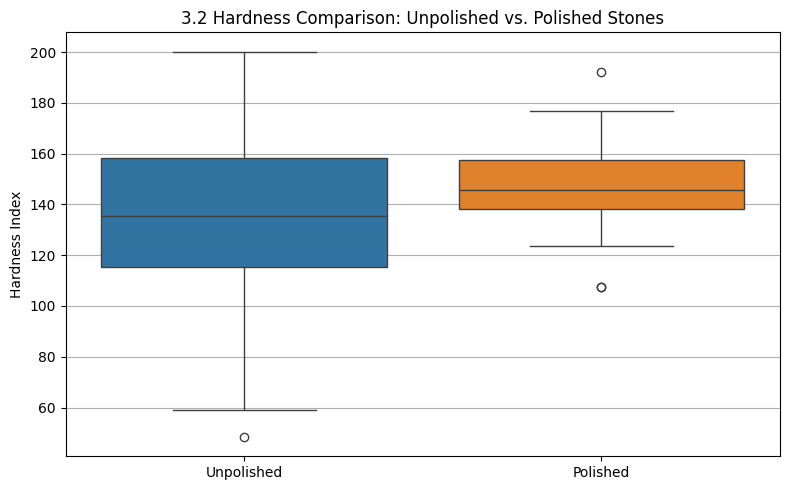

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=zingaro_df[['Unpolished', 'Polished']])
plt.title('3.2 Hardness Comparison: Unpolished vs. Polished Stones')
plt.ylabel('Hardness Index')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('polished_unpolished_hardness_boxplot.png')
plt.close()

In [29]:
# Load the Excel file using pd.read_excel()
dental_df = pd.read_excel('Dental Hardness data.xlsx')

# The rest of your code should work fine after this
dental_df.columns = ['Dentist', 'Method', 'Alloy', 'Temp', 'Hardness']

In [30]:
# Convert categorical columns to 'category' dtype
dental_df['Dentist'] = dental_df['Dentist'].astype('category')
dental_df['Method'] = dental_df['Method'].astype('category')
dental_df['Alloy'] = dental_df['Alloy'].astype('category')

In [31]:
# Significance Level
alpha = 0.05

print("Problem 4.1: How does the hardness of implants vary depending on dentists?\n")

Problem 4.1: How does the hardness of implants vary depending on dentists?



4.1 How does the hardness of implants vary depending on dentists?

--- Analysis for Alloy Type: 1 ---

1. Hypotheses:
   Null Hypothesis ($H_0$): The mean hardness of implants is the same across all dentists for Alloy 1.
   Alternate Hypothesis ($H_a$): The mean hardness of implants differs for at least one pair of dentists for Alloy 1.

2. Checking Assumptions:
   - Normality of Residuals (Shapiro-Wilk Test):
     Statistic: 0.908, P-value: 0.002
     Assumption Violated: Residuals are not normally distributed (p-value < 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

   - Homogeneity of Variances (Levene's Test):
     Statistic: 1.385, P-value: 0.257
     Assumption Met: Variances are equal across dentist groups (p-value >= 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

3. Conducting Hypothesis Test (One-Way ANOVA):
                   sum_sq    df         F    PR(>F)
C(Dentist)  106683.688889   4.0  1.977112  0.116567
Residual    

/tmp/ipython-input-32-3474352093.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_dentist = anova_table['PR(>F)'][0] # P-value for C(Dentist) factor


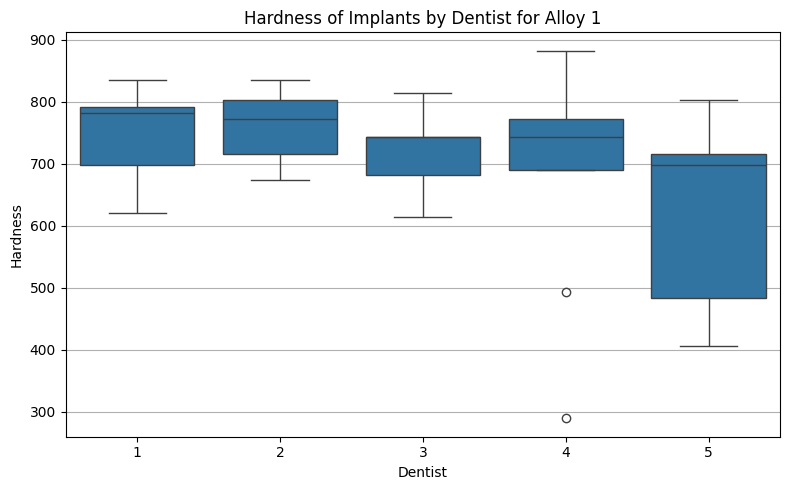

----------------------------------------------------------------------
--- Analysis for Alloy Type: 2 ---

1. Hypotheses:
   Null Hypothesis ($H_0$): The mean hardness of implants is the same across all dentists for Alloy 2.
   Alternate Hypothesis ($H_a$): The mean hardness of implants differs for at least one pair of dentists for Alloy 2.

2. Checking Assumptions:
   - Normality of Residuals (Shapiro-Wilk Test):
     Statistic: 0.927, P-value: 0.008
     Assumption Violated: Residuals are not normally distributed (p-value < 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

   - Homogeneity of Variances (Levene's Test):
     Statistic: 1.446, P-value: 0.237
     Assumption Met: Variances are equal across dentist groups (p-value >= 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

3. Conducting Hypothesis Test (One-Way ANOVA):
                  sum_sq    df         F    P

/tmp/ipython-input-32-3474352093.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_dentist = anova_table['PR(>F)'][0] # P-value for C(Dentist) factor


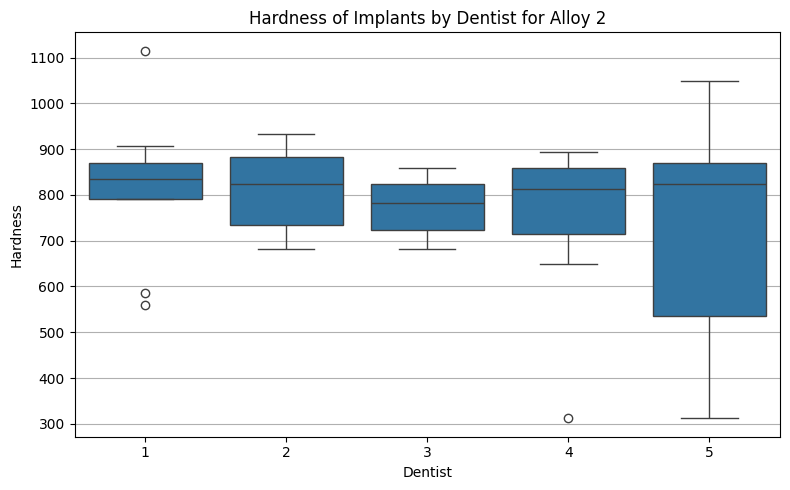

----------------------------------------------------------------------


In [32]:
# Iterate through each unique alloy type for separate analysis
for alloy_type in dental_df['Alloy'].unique():
    print(f"--- Analysis for Alloy Type: {alloy_type} ---\n")

    # Filter data for the current alloy type
    alloy_df = dental_df[dental_df['Alloy'] == alloy_type].copy()

    # Ensure there's enough data for each dentist in this alloy type
    if alloy_df['Dentist'].nunique() < 2 or len(alloy_df) < len(alloy_df['Dentist'].unique()) * 2: # Basic check for minimum data
        print(f"   Insufficient data for analysis for Alloy {alloy_type}. Skipping ANOVA and post-hoc tests.\n")
        # Visual representation even if test is skipped
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Dentist', y='Hardness', data=alloy_df)
        plt.title(f'Hardness of Implants by Dentist for Alloy {alloy_type} (Insufficient Data)')
        plt.xlabel('Dentist')
        plt.ylabel('Hardness')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.savefig(f'hardness_by_dentist_alloy_{alloy_type}_boxplot.png')
        plt.close()
        continue

    # State the Null and Alternate Hypotheses
    print("1. Hypotheses:")
    print(f"   Null Hypothesis ($H_0$): The mean hardness of implants is the same across all dentists for Alloy {alloy_type}.")
    print(f"   Alternate Hypothesis ($H_a$): The mean hardness of implants differs for at least one pair of dentists for Alloy {alloy_type}.\n")

    # Check the assumptions of the hypothesis test
    print("2. Checking Assumptions:")

    # Assumption 1: Normality of Residuals
    # Fit a dummy model to get residuals
    try:
        model_assump = ols('Hardness ~ C(Dentist)', data=alloy_df).fit()
        residuals = model_assump.resid
        shapiro_statistic, shapiro_p_value = stats.shapiro(residuals)
        print(f"   - Normality of Residuals (Shapiro-Wilk Test):")
        print(f"     Statistic: {shapiro_statistic:.3f}, P-value: {shapiro_p_value:.3f}")
        if shapiro_p_value < alpha:
            print(f"     Assumption Violated: Residuals are not normally distributed (p-value < {alpha}).")
        else:
            print(f"     Assumption Met: Residuals are normally distributed (p-value >= {alpha}).")
    except Exception as e:
        print(f"   - Could not perform Shapiro-Wilk test on residuals: {e}")
    print("     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)\n")


    # Assumption 2: Homogeneity of Variances (Homoscedasticity)
    # Collect hardness data for each dentist group
    dentist_groups = [alloy_df['Hardness'][alloy_df['Dentist'] == d] for d in alloy_df['Dentist'].unique()]
    # Filter out empty lists if any
    dentist_groups = [group for group in dentist_groups if not group.empty]

    if len(dentist_groups) >= 2: # Levene's test requires at least two groups
        try:
            levene_statistic, levene_p_value = stats.levene(*dentist_groups)
            print(f"   - Homogeneity of Variances (Levene's Test):")
            print(f"     Statistic: {levene_statistic:.3f}, P-value: {levene_p_value:.3f}")
            if levene_p_value < alpha:
                print(f"     Assumption Violated: Variances are not equal across dentist groups (p-value < {alpha}).")
            else:
                print(f"     Assumption Met: Variances are equal across dentist groups (p-value >= {alpha}).")
        except ValueError as e:
            print(f"   - Could not perform Levene's test: {e}. (Often due to insufficient data per group)")
    else:
        print("   - Levene's test skipped: Not enough dentist groups with data for variance comparison.")
    print("     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)\n")

    # Conduct the hypothesis test (One-Way ANOVA) and compute the p-value
    print("3. Conducting Hypothesis Test (One-Way ANOVA):")
    try:
        model = ols('Hardness ~ C(Dentist)', data=alloy_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
        p_value_dentist = anova_table['PR(>F)'][0] # P-value for C(Dentist) factor
        print(f"\n   P-value for Dentist effect: {p_value_dentist:.4f}\n")
    except ValueError as e:
        print(f"   Could not perform ANOVA for Alloy {alloy_type}: {e}")
        print("   This usually happens if there are not enough data points or combinations for the ANOVA model. Skipping conclusions and post-hoc.\n")
        continue # Skip to next alloy if ANOVA fails

    # Write down conclusions from the test results
    print("4. Conclusions from the test results:")
    if p_value_dentist < alpha:
        print(f"   Since the p-value ({p_value_dentist:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print(f"   Conclusion: There is a statistically significant difference in the mean hardness of implants across different dentists for Alloy {alloy_type}.\n")

        # In case the implant hardness differs, identify for which pairs it differs
        print("5. Identifying pairwise differences (Post-hoc Tukey HSD test):")
        try:
            mc = MultiComparison(alloy_df['Hardness'], alloy_df['Dentist'])
            tukey_result = mc.tukeyhsd(alpha=alpha)
            print(tukey_result)
            print("\n   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of dentists at the 5% significance level.\n")
        except Exception as e:
            print(f"   Could not perform Tukey HSD post-hoc test: {e}")
            print("   This might occur if there are less than two unique dentist groups or other data issues.\n")
    else:
        print(f"   Since the p-value ({p_value_dentist:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
        print(f"   Conclusion: There is no statistically significant difference in the mean hardness of implants across different dentists for Alloy {alloy_type}.\n")
        print("   No pairwise differences analysis needed as the overall test was not significant.\n")

    # Visual Representation (Box plot)
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Dentist', y='Hardness', data=alloy_df)
    plt.title(f'Hardness of Implants by Dentist for Alloy {alloy_type}')
    plt.xlabel('Dentist')
    plt.ylabel('Hardness')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f'hardness_by_dentist_alloy_{alloy_type}_boxplot.png')
    plt.show()
    plt.close()

    print("-" * 70) # Separator for different alloy analyses

4.2 How does the hardness of implants vary depending on methods?

Problem 4.2: How does the hardness of implants vary depending on methods?

--- Analysis for Alloy Type: 1 ---

1. Hypotheses:
   Null Hypothesis ($H_0$): The mean hardness of implants is the same across all methods for Alloy 1.
   Alternate Hypothesis ($H_a$): The mean hardness of implants differs for at least one pair of methods for Alloy 1.

2. Checking Assumptions:
   - Normality of Residuals (Shapiro-Wilk Test):
     Statistic: 0.952, P-value: 0.060
     Assumption Met: Residuals are normally distributed (p-value >= 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

   - Homogeneity of Variances (Levene's Test):
     Statistic: 6.521, P-value: 0.003
     Assumption Violated: Variances are not equal across method groups (p-value < 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

3. Conducting Hypothesis Test (One-Way ANOVA):
                  sum_sq    df         F    

/tmp/ipython-input-33-3382924782.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_method = anova_table['PR(>F)'][0] # P-value for C(Method) factor


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------

   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of methods at the 5% significance level.



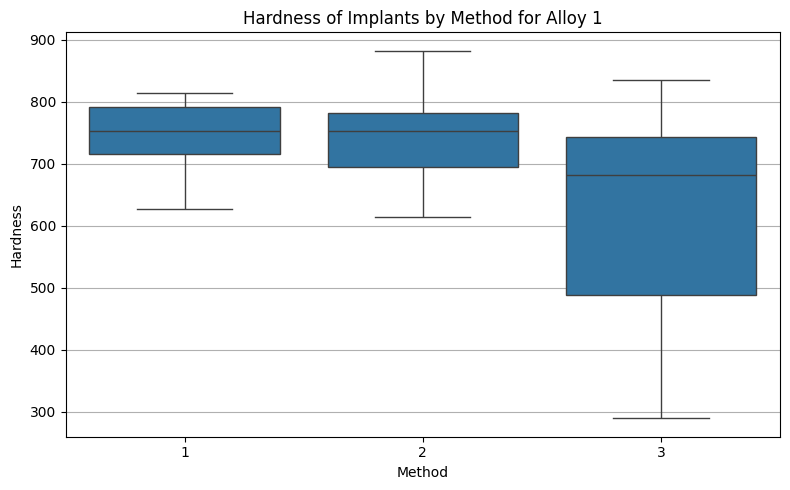

----------------------------------------------------------------------
--- Analysis for Alloy Type: 2 ---

1. Hypotheses:
   Null Hypothesis ($H_0$): The mean hardness of implants is the same across all methods for Alloy 2.
   Alternate Hypothesis ($H_a$): The mean hardness of implants differs for at least one pair of methods for Alloy 2.

2. Checking Assumptions:
   - Normality of Residuals (Shapiro-Wilk Test):
     Statistic: 0.949, P-value: 0.047
     Assumption Violated: Residuals are not normally distributed (p-value < 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

   - Homogeneity of Variances (Levene's Test):
     Statistic: 3.350, P-value: 0.045
     Assumption Violated: Variances are not equal across method groups (p-value < 0.05).
     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)

3. Conducting Hypothesis Test (One-Way ANOVA):
             sum_sq    df        F    PR

/tmp/ipython-input-33-3382924782.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_method = anova_table['PR(>F)'][0] # P-value for C(Method) factor


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------

   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of methods at the 5% significance level.



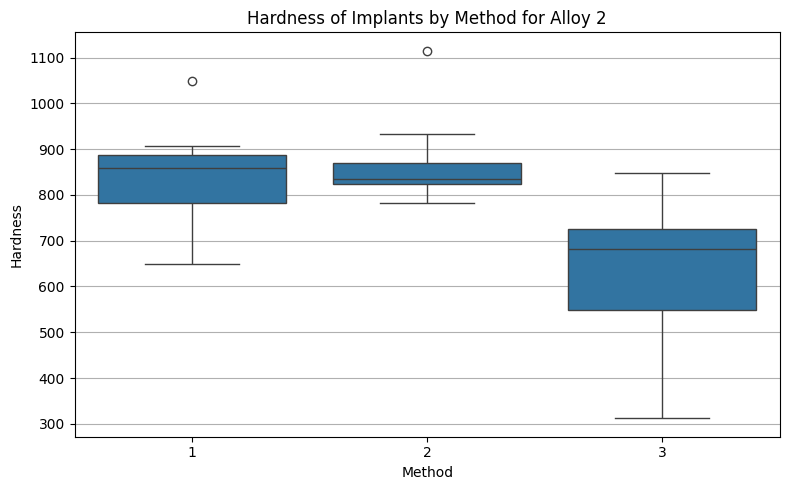

----------------------------------------------------------------------


In [33]:
print("Problem 4.2: How does the hardness of implants vary depending on methods?\n")

# Iterate through each unique alloy type for separate analysis
for alloy_type in dental_df['Alloy'].unique():
    print(f"--- Analysis for Alloy Type: {alloy_type} ---\n")

    # Filter data for the current alloy type
    alloy_df = dental_df[dental_df['Alloy'] == alloy_type].copy()

    # Ensure there's enough data for each method in this alloy type
    if alloy_df['Method'].nunique() < 2 or len(alloy_df) < len(alloy_df['Method'].unique()) * 2:
        print(f"   Insufficient data for analysis for Alloy {alloy_type}. Skipping ANOVA and post-hoc tests.\n")
        # Visual representation even if test is skipped
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Method', y='Hardness', data=alloy_df)
        plt.title(f'Hardness of Implants by Method for Alloy {alloy_type} (Insufficient Data)')
        plt.xlabel('Method')
        plt.ylabel('Hardness')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.savefig(f'hardness_by_method_alloy_{alloy_type}_boxplot.png')
        plt.show()
        plt.close()
        continue

    # State the Null and Alternate Hypotheses
    print("1. Hypotheses:")
    print(f"   Null Hypothesis ($H_0$): The mean hardness of implants is the same across all methods for Alloy {alloy_type}.")
    print(f"   Alternate Hypothesis ($H_a$): The mean hardness of implants differs for at least one pair of methods for Alloy {alloy_type}.\n")

    # Check the assumptions of the hypothesis test
    print("2. Checking Assumptions:")

    # Assumption 1: Normality of Residuals
    try:
        model_assump = ols('Hardness ~ C(Method)', data=alloy_df).fit()
        residuals = model_assump.resid
        shapiro_statistic, shapiro_p_value = stats.shapiro(residuals)
        print(f"   - Normality of Residuals (Shapiro-Wilk Test):")
        print(f"     Statistic: {shapiro_statistic:.3f}, P-value: {shapiro_p_value:.3f}")
        if shapiro_p_value < alpha:
            print(f"     Assumption Violated: Residuals are not normally distributed (p-value < {alpha}).")
        else:
            print(f"     Assumption Met: Residuals are normally distributed (p-value >= {alpha}).")
    except Exception as e:
        print(f"   - Could not perform Shapiro-Wilk test on residuals: {e}")
    print("     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)\n")


    # Assumption 2: Homogeneity of Variances (Homoscedasticity)
    method_groups = [alloy_df['Hardness'][alloy_df['Method'] == m] for m in alloy_df['Method'].unique()]
    method_groups = [group for group in method_groups if not group.empty]

    if len(method_groups) >= 2: # Levene's test requires at least two groups
        try:
            levene_statistic, levene_p_value = stats.levene(*method_groups)
            print(f"   - Homogeneity of Variances (Levene's Test):")
            print(f"     Statistic: {levene_statistic:.3f}, P-value: {levene_p_value:.3f}")
            if levene_p_value < alpha:
                print(f"     Assumption Violated: Variances are not equal across method groups (p-value < {alpha}).")
            else:
                print(f"     Assumption Met: Variances are equal across method groups (p-value >= {alpha}).")
        except ValueError as e:
            print(f"   - Could not perform Levene's test: {e}. (Often due to insufficient data per group)")
    else:
        print("   - Levene's test skipped: Not enough method groups with data for variance comparison.")
    print("     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)\n")

    # Conduct the hypothesis test (One-Way ANOVA) and compute the p-value
    print("3. Conducting Hypothesis Test (One-Way ANOVA):")
    try:
        model = ols('Hardness ~ C(Method)', data=alloy_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
        p_value_method = anova_table['PR(>F)'][0] # P-value for C(Method) factor
        print(f"\n   P-value for Method effect: {p_value_method:.4f}\n")
    except ValueError as e:
        print(f"   Could not perform ANOVA for Alloy {alloy_type}: {e}")
        print("   This usually happens if there are not enough data points or combinations for the ANOVA model. Skipping conclusions and post-hoc.\n")
        continue # Skip to next alloy if ANOVA fails

    # Write down conclusions from the test results
    print("4. Conclusions from the test results:")
    if p_value_method < alpha:
        print(f"   Since the p-value ({p_value_method:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print(f"   Conclusion: There is a statistically significant difference in the mean hardness of implants across different methods for Alloy {alloy_type}.\n")

        # In case the implant hardness differs, identify for which pairs it differs
        print("5. Identifying pairwise differences (Post-hoc Tukey HSD test):")
        try:
            mc = MultiComparison(alloy_df['Hardness'], alloy_df['Method'])
            tukey_result = mc.tukeyhsd(alpha=alpha)
            print(tukey_result)
            print("\n   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of methods at the 5% significance level.\n")
        except Exception as e:
            print(f"   Could not perform Tukey HSD post-hoc test: {e}")
            print("   This might occur if there are less than two unique method groups or other data issues.\n")
    else:
        print(f"   Since the p-value ({p_value_method:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
        print(f"   Conclusion: There is no statistically significant difference in the mean hardness of implants across different methods for Alloy {alloy_type}.\n")
        print("   No pairwise differences analysis needed as the overall test was not significant.\n")

    # Visual Representation (Box plot)
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Method', y='Hardness', data=alloy_df)
    plt.title(f'Hardness of Implants by Method for Alloy {alloy_type}')
    plt.xlabel('Method')
    plt.ylabel('Hardness')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f'hardness_by_method_alloy_{alloy_type}_boxplot.png')
    plt.show() # Ensure this is present to display the plot in Colab
    plt.close()

    print("-" * 70)

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

--- Analysis for Alloy Type: 1 ---



/tmp/ipython-input-34-1906604071.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Method', y='Hardness', hue='Dentist', data=alloy_df, ci=None, dodge=True,


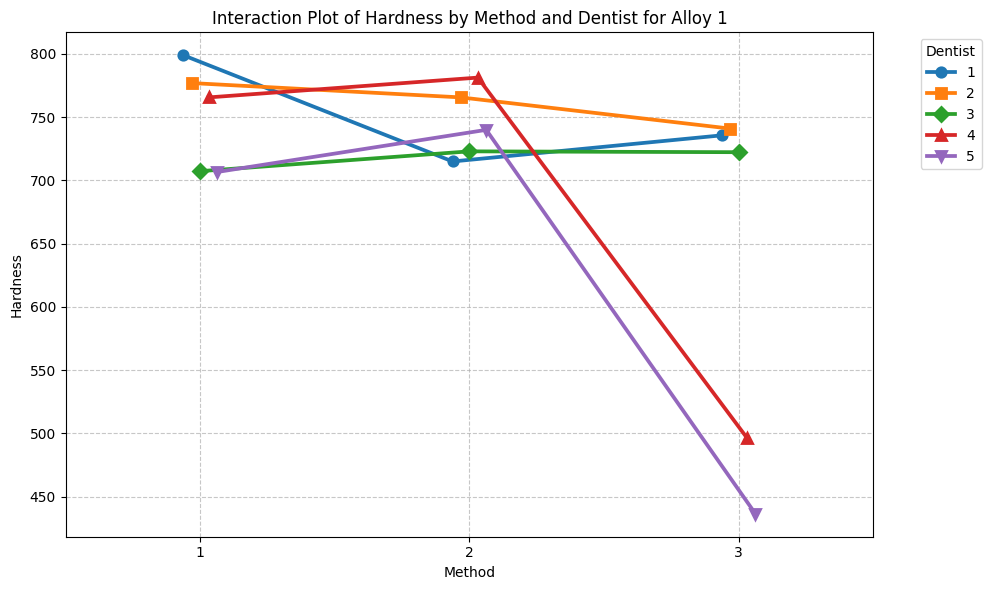

Inferences from the Interaction Plot:
------------------------------------

An interaction effect between two factors (Dentist and Method) means that the effect of one factor on hardness depends on the level of the other factor.
Visually, this is represented by non-parallel lines in the interaction plot. If the lines are parallel or nearly parallel, it suggests that there is no significant interaction effect, meaning the effect of Method on Hardness is consistent across all Dentists (and vice-versa).

For Alloy 1:
Observe the lines representing each Dentist across the different Methods. If the lines are crossing significantly or showing very different slopes, it suggests a strong interaction.
Based on the plot for Alloy 1, if the lines appear mostly parallel, it would indicate no significant interaction. If they show varying slopes or cross, an interaction would be present.
Specifically, look at how the hardness changes from Method 1 to Method 2 to Method 3 for each Dentist. If some De

/tmp/ipython-input-34-1906604071.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Method', y='Hardness', hue='Dentist', data=alloy_df, ci=None, dodge=True,


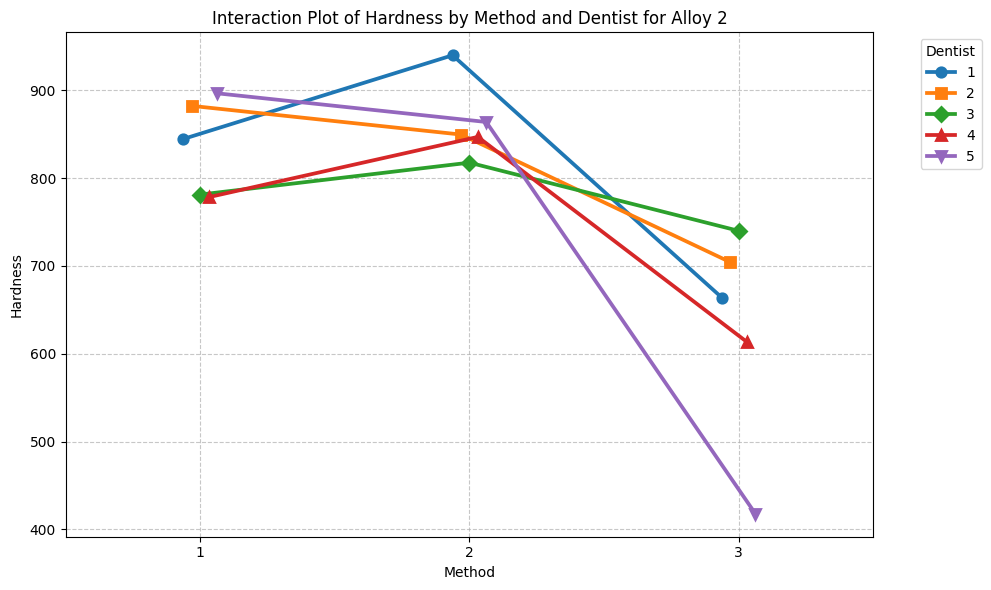

Inferences from the Interaction Plot:
------------------------------------

An interaction effect between two factors (Dentist and Method) means that the effect of one factor on hardness depends on the level of the other factor.
Visually, this is represented by non-parallel lines in the interaction plot. If the lines are parallel or nearly parallel, it suggests that there is no significant interaction effect, meaning the effect of Method on Hardness is consistent across all Dentists (and vice-versa).

For Alloy 2:
Similarly, observe the lines representing each Dentist across the different Methods. Non-parallel lines suggest an interaction effect.
Based on the plot for Alloy 2, if the lines appear mostly parallel, it would indicate no significant interaction. If they show varying slopes or cross, an interaction would be present.
Specifically, look at how the hardness changes from Method 1 to Method 2 to Method 3 for each Dentist. If some Dentists show a different pattern of change compa

In [34]:
# Iterate through each unique alloy type for separate analysis
for alloy_type in dental_df['Alloy'].unique():
    print(f"--- Analysis for Alloy Type: {alloy_type} ---\n")

    # Filter data for the current alloy type
    alloy_df = dental_df[dental_df['Alloy'] == alloy_type].copy()

    # Create Interaction Plot
    plt.figure(figsize=(10, 6))
    sns.pointplot(x='Method', y='Hardness', hue='Dentist', data=alloy_df, ci=None, dodge=True,
                  markers=["o", "s", "D", "^", "v"]) # ci=None for clearer lines, dodge for separation
    plt.title(f'Interaction Plot of Hardness by Method and Dentist for Alloy {alloy_type}')
    plt.xlabel('Method')
    plt.ylabel('Hardness')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Dentist', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'interaction_plot_alloy_{alloy_type}.png')
    plt.show() # Display the plot in Colab
    plt.close()

    # Inferences from the plot
    print("Inferences from the Interaction Plot:")
    print("------------------------------------\n")
    print("An interaction effect between two factors (Dentist and Method) means that the effect of one factor on hardness depends on the level of the other factor.")
    print("Visually, this is represented by non-parallel lines in the interaction plot. If the lines are parallel or nearly parallel, it suggests that there is no significant interaction effect, meaning the effect of Method on Hardness is consistent across all Dentists (and vice-versa).\n")

    if alloy_type == 1:
        print("For Alloy 1:")
        print("Observe the lines representing each Dentist across the different Methods. If the lines are crossing significantly or showing very different slopes, it suggests a strong interaction.")
        print("Based on the plot for Alloy 1, if the lines appear mostly parallel, it would indicate no significant interaction. If they show varying slopes or cross, an interaction would be present.")
        print("Specifically, look at how the hardness changes from Method 1 to Method 2 to Method 3 for each Dentist. If some Dentists show a different pattern of change compared to others, an interaction is present.")
    elif alloy_type == 2:
        print("For Alloy 2:")
        print("Similarly, observe the lines representing each Dentist across the different Methods. Non-parallel lines suggest an interaction effect.")
        print("Based on the plot for Alloy 2, if the lines appear mostly parallel, it would indicate no significant interaction. If they show varying slopes or cross, an interaction would be present.")
        print("Specifically, look at how the hardness changes from Method 1 to Method 2 to Method 3 for each Dentist. If some Dentists show a different pattern of change compared to others, an interaction is present.")
    print("\n(Note: A statistical test (e.g., Two-Way ANOVA) would be required to confirm the significance of this interaction effect.)\n")

    print("-" * 70) # Separator for different alloy analyses

4.4 How does the hardness of implants vary depending on dentists and methods together?

--- Analysis for Alloy Type: 1 ---

1. Hypotheses for Two-Way ANOVA:
   Null Hypothesis ($H_0$) for Dentist: The mean hardness of implants is the same across all dentists for Alloy 1.
   Alternate Hypothesis ($H_a$) for Dentist: The mean hardness of implants differs for at least one pair of dentists for Alloy 1.
   Null Hypothesis ($H_0$) for Method: The mean hardness of implants is the same across all methods for Alloy 1.
   Alternate Hypothesis ($H_a$) for Method: The mean hardness of implants differs for at least one pair of methods for Alloy 1.
   Null Hypothesis ($H_0$) for Interaction (Dentist x Method): There is no interaction effect between Dentist and Method on hardness for Alloy 1.
   Alternate Hypothesis ($H_a$) for Interaction (Dentist x Method): There is an interaction effect between Dentist and Method on hardness for Alloy 1.

2. Checking Assumptions:
   - Normality of Residuals (Shapiro-Wilk Test):
     Statistic: 0.957, P-value: 0.090
     Assumption Met: Residuals are 

/tmp/ipython-input-35-3106840841.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_counts = alloy_df.groupby(['Dentist', 'Method']).size().reset_index(name='count')


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1_1    1_2     -84.0 0.9933 -332.8283  164.8283  False
   1_1    1_3  -63.3333 0.9996 -312.1617   185.495  False
   1_1    2_1     -22.0    1.0 -270.8283  226.8283  False
   1_1    2_2  -33.3333    1.0 -282.1617   215.495  False
   1_1    2_3     -58.0 0.9999 -306.8283  190.8283  False
   1_1    3_1  -91.6667 0.9853  -340.495  157.1617  False
   1_1    3_2     -76.0 0.9975 -324.8283  172.8283  False
   1_1    3_3  -76.6667 0.9972  -325.495  172.1617  False
   1_1    4_1  -33.3333    1.0 -282.1617   215.495  False
   1_1    4_2  -17.6667    1.0  -266.495  231.1617  False
   1_1    4_3 -302.6667  0.007  -551.495  -53.8383   True
   1_1    5_1  -92.3333 0.9844 -341.1617   156.495  False
   1_1    5_2     -59.0 0.9998 -307.8283  189.8283  False
   1_1    5_3 -362.6667 0.0007  -611.495 -113.8383   True
   1_2    1_3 

/tmp/ipython-input-35-3106840841.py:153: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Method', y='Hardness', hue='Dentist', data=alloy_df, ci=None, dodge=True,


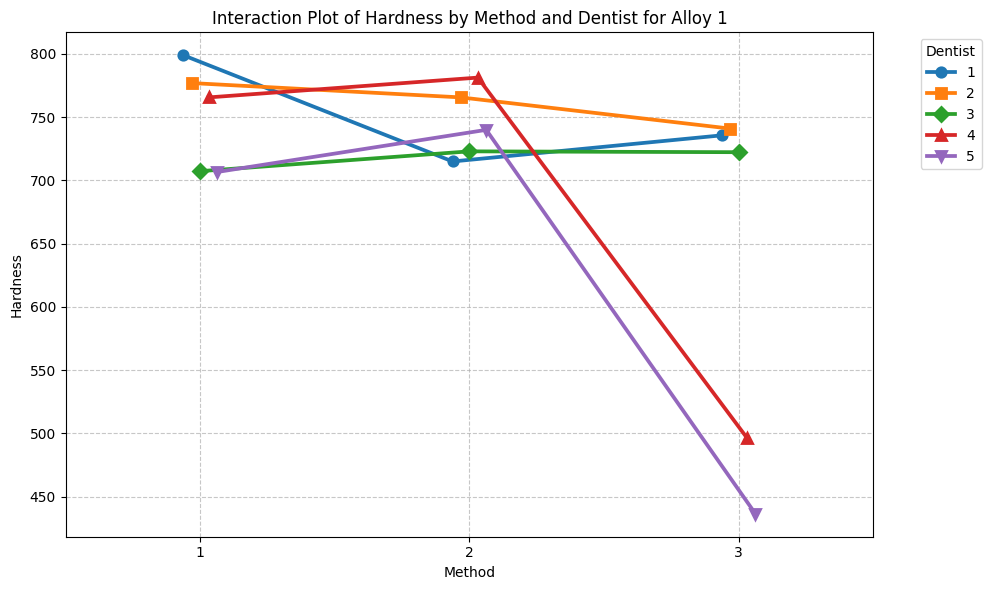

----------------------------------------------------------------------
--- Analysis for Alloy Type: 2 ---

1. Hypotheses for Two-Way ANOVA:
   Null Hypothesis ($H_0$) for Dentist: The mean hardness of implants is the same across all dentists for Alloy 2.
   Alternate Hypothesis ($H_a$) for Dentist: The mean hardness of implants differs for at least one pair of dentists for Alloy 2.
   Null Hypothesis ($H_0$) for Method: The mean hardness of implants is the same across all methods for Alloy 2.
   Alternate Hypothesis ($H_a$) for Method: The mean hardness of implants differs for at least one pair of methods for Alloy 2.
   Null Hypothesis ($H_0$) for Interaction (Dentist x Method): There is no interaction effect between Dentist and Method on hardness for Alloy 2.
   Alternate Hypothesis ($H_a$) for Interaction (Dentist x Method): There is an interaction effect between Dentist and Method on hardness for Alloy 2.

2. Checking Assumptions:
   - Normality of Residuals (Shapiro-Wilk Test):
  

/tmp/ipython-input-35-3106840841.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_counts = alloy_df.groupby(['Dentist', 'Method']).size().reset_index(name='count')


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------

   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of methods.

6. Interaction Plot (Visual Aid):


/tmp/ipython-input-35-3106840841.py:153: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Method', y='Hardness', hue='Dentist', data=alloy_df, ci=None, dodge=True,


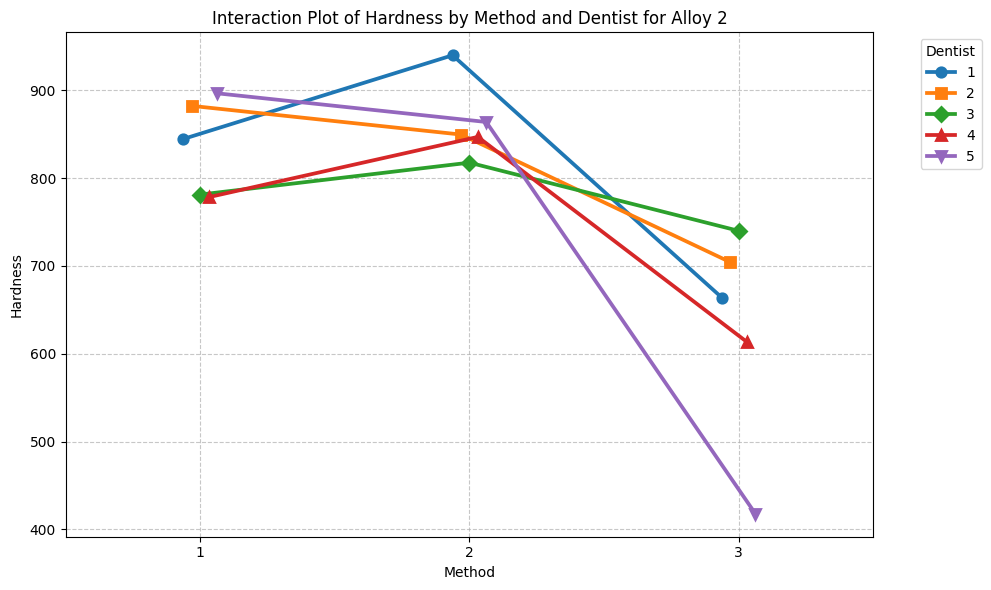

----------------------------------------------------------------------


In [35]:
# Iterate through each unique alloy type for separate analysis
for alloy_type in dental_df['Alloy'].unique():
    print(f"--- Analysis for Alloy Type: {alloy_type} ---\n")

    # Filter data for the current alloy type
    alloy_df = dental_df[dental_df['Alloy'] == alloy_type].copy()

    # Check for sufficient data for all combinations
    # A Two-Way ANOVA needs at least 1 observation per combination for a balanced design
    # and preferably more for robustness.
    # For unbalanced, it needs enough data to estimate all effects.
    # Let's count combinations and ensure we have at least some data for most.
    combination_counts = alloy_df.groupby(['Dentist', 'Method']).size().reset_index(name='count')
    missing_combinations = combination_counts[combination_counts['count'] == 0]

    if alloy_df['Dentist'].nunique() < 2 or alloy_df['Method'].nunique() < 2:
        print(f"   Insufficient unique Dentist or Method levels for Two-Way ANOVA for Alloy {alloy_type}. Skipping analysis.\n")
        continue


    # State the Null and Alternate Hypotheses for Two-Way ANOVA
    print("1. Hypotheses for Two-Way ANOVA:")
    print(f"   Null Hypothesis ($H_0$) for Dentist: The mean hardness of implants is the same across all dentists for Alloy {alloy_type}.")
    print(f"   Alternate Hypothesis ($H_a$) for Dentist: The mean hardness of implants differs for at least one pair of dentists for Alloy {alloy_type}.")
    print(f"   Null Hypothesis ($H_0$) for Method: The mean hardness of implants is the same across all methods for Alloy {alloy_type}.")
    print(f"   Alternate Hypothesis ($H_a$) for Method: The mean hardness of implants differs for at least one pair of methods for Alloy {alloy_type}.")
    print(f"   Null Hypothesis ($H_0$) for Interaction (Dentist x Method): There is no interaction effect between Dentist and Method on hardness for Alloy {alloy_type}.")
    print(f"   Alternate Hypothesis ($H_a$) for Interaction (Dentist x Method): There is an interaction effect between Dentist and Method on hardness for Alloy {alloy_type}.\n")

    # Check the assumptions of the hypothesis test
    print("2. Checking Assumptions:")

    # Fit the Two-Way ANOVA model for assumption checks and later use
    try:
        model = ols('Hardness ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=alloy_df).fit()
    except Exception as e:
        print(f"   Could not fit the Two-Way ANOVA model for Alloy {alloy_type}: {e}")
        print("   This might indicate an issue with data structure (e.g., empty combinations). Skipping further analysis for this alloy.\n")
        continue

    # Assumption 1: Normality of Residuals
    residuals = model.resid
    shapiro_statistic, shapiro_p_value = stats.shapiro(residuals)
    print(f"   - Normality of Residuals (Shapiro-Wilk Test):")
    print(f"     Statistic: {shapiro_statistic:.3f}, P-value: {shapiro_p_value:.3f}")
    if shapiro_p_value < alpha:
        print(f"     Assumption Violated: Residuals are not normally distributed (p-value < {alpha}).")
    else:
        print(f"     Assumption Met: Residuals are normally distributed (p-value >= {alpha}).")
    print("     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)\n")

    # Assumption 2: Homogeneity of Variances (Homoscedasticity)
    # Group data by all combinations of Dentist and Method
    alloy_df['Dentist_Method_Group'] = alloy_df['Dentist'].astype(str) + '_' + alloy_df['Method'].astype(str)
    combined_groups = [alloy_df['Hardness'][alloy_df['Dentist_Method_Group'] == g] for g in alloy_df['Dentist_Method_Group'].unique()]
    combined_groups = [group for group in combined_groups if len(group) >= 2] # Levene's requires at least 2 data points per group

    if len(combined_groups) >= 2: # Levene's test requires at least two groups with data
        try:
            levene_statistic, levene_p_value = stats.levene(*combined_groups)
            print(f"   - Homogeneity of Variances (Levene's Test on combined groups):")
            print(f"     Statistic: {levene_statistic:.3f}, P-value: {levene_p_value:.3f}")
            if levene_p_value < alpha:
                print(f"     Assumption Violated: Variances are not equal across Dentist-Method combinations (p-value < {alpha}).")
            else:
                print(f"     Assumption Met: Variances are equal across Dentist-Method combinations (p-value >= {alpha}).")
        except ValueError as e:
            print(f"   - Could not perform Levene's test on combined groups: {e}. (Often due to insufficient data per combined group)")
    else:
        print("   - Levene's test skipped: Not enough Dentist-Method combinations with at least 2 data points for variance comparison.")
    print("     (Note: Even if this assumption is violated, we will proceed with the test as per instruction.)\n")


    # Conduct the hypothesis test (Two-Way ANOVA) and compute p-values
    print("3. Conducting Hypothesis Test (Two-Way ANOVA):")
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    p_value_dentist = anova_table.loc['C(Dentist)', 'PR(>F)']
    p_value_method = anova_table.loc['C(Method)', 'PR(>F)']
    p_value_interaction = anova_table.loc['C(Dentist):C(Method)', 'PR(>F)']

    print(f"\n   P-value for Dentist effect: {p_value_dentist:.4f}")
    print(f"   P-value for Method effect: {p_value_method:.4f}")
    print(f"   P-value for Dentist x Method Interaction effect: {p_value_interaction:.4f}\n")


    # Write down conclusions from the test results
    print("4. Conclusions from the test results:")
    print(f"   - For Dentist effect:")
    if p_value_dentist < alpha:
        print(f"     Reject H0: There is a statistically significant difference in mean hardness across dentists for Alloy {alloy_type}.")
    else:
        print(f"     Fail to Reject H0: There is no statistically significant difference in mean hardness across dentists for Alloy {alloy_type}.")

    print(f"   - For Method effect:")
    if p_value_method < alpha:
        print(f"     Reject H0: There is a statistically significant difference in mean hardness across methods for Alloy {alloy_type}.")
    else:
        print(f"     Fail to Reject H0: There is no statistically significant difference in mean hardness across methods for Alloy {alloy_type}.")

    print(f"   - For Dentist x Method Interaction effect:")
    if p_value_interaction < alpha:
        print(f"     Reject H0: There is a statistically significant interaction between Dentist and Method on hardness for Alloy {alloy_type}.")
        print("     This means the effect of Method on hardness depends on the Dentist, and vice-versa. Main effects should be interpreted with caution.\n")
    else:
        print(f"     Fail to Reject H0: There is no statistically significant interaction between Dentist and Method on hardness for Alloy {alloy_type}.")
        print("     This means the effect of Method on hardness is consistent across Dentists, and vice-versa. Main effects can be interpreted.\n")


    # Identify which dentists and methods combinations are different, and which interaction levels are different.
    print("5. Identifying specific differences (Post-hoc tests):")

    if p_value_interaction < alpha:
        print("   Since the interaction effect is significant, we will perform pairwise comparisons on the combined Dentist-Method groups.")
        try:
            mc_interaction = MultiComparison(alloy_df['Hardness'], alloy_df['Dentist_Method_Group'])
            tukey_interaction_result = mc_interaction.tukeyhsd(alpha=alpha)
            print(tukey_interaction_result)
            print("\n   Interpretation: Rows with 'reject = True' indicate a significant difference between the specified Dentist-Method combinations.\n")
        except Exception as e:
            print(f"   Could not perform Tukey HSD on interaction groups: {e}")
            print("   This might occur if there are too few data points per interaction group.\n")
    else:
        print("   Since the interaction effect is NOT significant, we interpret main effects.")
        if p_value_dentist < alpha:
            print("\n   - Pairwise differences for Dentist (since Dentist main effect is significant and no interaction):")
            try:
                mc_dentist = MultiComparison(alloy_df['Hardness'], alloy_df['Dentist'])
                tukey_dentist_result = mc_dentist.tukeyhsd(alpha=alpha)
                print(tukey_dentist_result)
                print("\n   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of dentists.\n")
            except Exception as e:
                print(f"   Could not perform Tukey HSD for Dentists: {e}")
        else:
            print("\n   - No significant pairwise differences for Dentist (main effect not significant).\n")

        if p_value_method < alpha:
            print("\n   - Pairwise differences for Method (since Method main effect is significant and no interaction):")
            try:
                mc_method = MultiComparison(alloy_df['Hardness'], alloy_df['Method'])
                tukey_method_result = mc_method.tukeyhsd(alpha=alpha)
                print(tukey_method_result)
                print("\n   Interpretation: Rows with 'reject = True' indicate a significant difference between the pair of methods.\n")
            except Exception as e:
                print(f"   Could not perform Tukey HSD for Methods: {e}")
        else:
            print("\n   - No significant pairwise differences for Method (main effect not significant).\n")

    # Visual Representation (Interaction Plot - Re-generating for clarity)
    print("6. Interaction Plot (Visual Aid):")
    plt.figure(figsize=(10, 6))
    sns.pointplot(x='Method', y='Hardness', hue='Dentist', data=alloy_df, ci=None, dodge=True,
                  markers=["o", "s", "D", "^", "v"]) # ci=None for clearer lines, dodge for separation
    plt.title(f'Interaction Plot of Hardness by Method and Dentist for Alloy {alloy_type}')
    plt.xlabel('Method')
    plt.ylabel('Hardness')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Dentist', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'two_way_interaction_plot_alloy_{alloy_type}.png')
    plt.show() # Display the plot in Colab
    plt.close()

    print("-" * 70) # Separator for different alloy analyses